# Geothermics Exercises
These exercises are inspired by [Turcotte and Schubert *Geodynamics*](https://www.cambridge.org/de/academic/subjects/earth-and-environmental-science/structural-geology-tectonics-and-geodynamics/geodynamics-3rd-edition?format=PB&isbn=9780521186230) and [Beardsmore *Crustal Heat Flow*](https://www.cambridge.org/core/books/crustal-heat-%20flow/90C25BAC9C22E55B59D1261CFB49946C). 

1. [Increase in oceanic lithosphere thickness with time](#litho)
2. [Solidification of a magma lake](#solid)

<a id="litho"></a>
## 1. Heating of Cooling of a Semi-Infinite Half-Space
In the lecture, we briefly about Lord Kelvin's approach to assess the age of the Earth by assuming the solution of a cooling semi-infinite half-space. Basically, he assumed that the specific heat flow at the surface is the result of a cooling process of the Earth. In the beginning, he assumed, Earth had the same temperature still present at its core.  
As we saw, his approach is using the diffusion equation flawed because he did not consider / did not know about concepts like radiogenic heat generation in the mantle or thermal convection (solid-state) in the mantle.   

$$ \frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} $$

Nonetheless, this equation can also be used for determining the thermal structure of oceanig lithosphere. At a MOR (Mid Ocean Ridge), new hot crust is exposed to cold sea water. With time and seafloor spreading, rocks near the interface between seafloor and water cool down and lose their heat to the water. 

In a semi-infinite half-space defined with y > 0, we can obtain the solution to the scenario above by solving the equation above. At t=0, the lithosphere (half-space) has its original temperature $T_0$. Now, at the interface to the water (the *surface*), the temperature changes to a lower temperature $T_1$ at times $t > 0$. That causes a cooling from above, i.e. heat flowing upwards towards the surface. 

![picture](half_space.png)

One can change the diffusion equation above for including the different temperatures by introducing a dimensionless time $\Theta$ using the concept of *similarity*.  

$$\Theta = \frac{T - T_0}{T_1 - T_0} $$  
$$ \frac{\partial \Theta}{\partial t} = \kappa \frac{\partial^2 \Theta}{\partial x^2} $$  
With the conditions $\Theta(x,0) = 0$, $\Theta(0,t) = 1$, $\Theta(\infty,t) = 0$.

As stated above, the half-space solution can be used to model the cooling of oceanic lithosphere. The bottom of said lithosphere, which is moving horizontally with a velocity $v$ above the mantle, can be seen as an isotherm. So, the lithosphere is a package, moving relative to the mantle, and bounded by the surface (seafloor), and an isotherm (around 1600 K). The lithosphere thickens over time, so the isothermal boundary at its bottom will be deeper the older the lithosphere is. Due to the seafloor spreading at a MOR, age is also a function of velocity. With a constant spreading-velocity, the lithosphere at a distance $x$ to the MOR can be considered Y years old.  

The cooling / thickening of the lithosphere can be described as an equation similar to the one in Kelvin's exercise:  
$$ t = x v^{-1} $$
$$\Theta = erf\bigg(\frac{y}{2\sqrt{\kappa x v^{-1}}}\bigg)$$  

<div class="alert alert-info"> **Task:**  
Re-arrange the equation above to come up with a formulation of `y` (the depth, thickness of the oceanic lithosphere).  
Use the obtained equation to calculate and plot the age dependent thickness of oceanic lithosphere (so `y`) for the following parameters (i.e. plot isotherms):  
T_0 = 277.15 K  
T_1 = 1600 K  
T = 600 K - 1400 K  in steps of 200 K  
$\kappa$ = 1.2 mm² s$^{-1}$  
t = 0 Myr to 150 Myr  

</div>

The error function can be used as a function in `scipy.special`.

In [3]:
# used libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.special import erf, erfinv

In [146]:
# define the parameters

In [147]:
# solve the re-arranged equation

In [2]:
# plot the result

Text(0,0.5,'depth (km)')

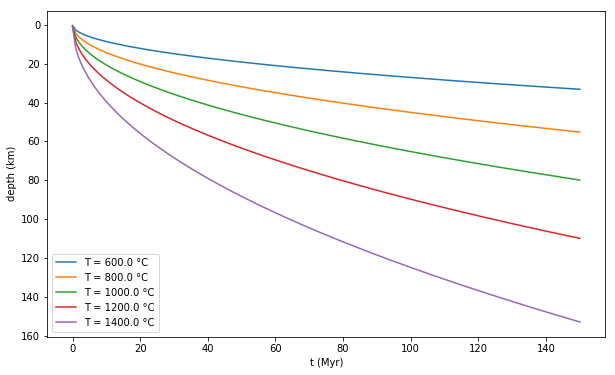

In [12]:
# solution
T0 = 277.15 
T1 = 1600 
T = np.linspace(600, 1400, 5)
t = np.linspace(0.01, 150, 151)
k = 1.2e-6
y2s = 3600*24*365.25

y = erfinv((T[0]-T0)/(T1-T0))*2*np.sqrt(k*t*y2s*1e6)
for i in T[1:]:
    yt = erfinv((i-T0)/(T1-T0))*2*np.sqrt(k*t*y2s*1e6)
    y = np.vstack([y,yt])
    
fig = plt.figure(figsize=[10,6])
for i in range(len(y[:,0])):
    plt.plot(t, y[i,:]/1000, label='T = {} °C'.format(T[i]))
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('t (Myr)')
plt.ylabel('depth (km)')

<a id='solid'></a>
## 2. Cooling and Solidification of a lava lake
Assume a lava lake on the infant moon which formed by a collision of a mars sized body with the proto-earth. Assume that the moon was covered by a lava sea of about 50 km depth. Its initial temperature was at 1500 K with a surface temperature of 500 K.   
A solidification boundary $y_m$ can be determined by   

$$ y_m = 2 \xi \sqrt{\kappa t} $$  

To obtain $\xi$, we have to iteratively solve   

$$\frac{L\sqrt{\pi}}{c(T_m - T_0)} = \frac{e^{-\xi^2}}{\lambda_1 erf\xi} $$  

<div class="alert alert-info">**Task:**  
Take the following values for the left side of the second equation to obtain a value for lambda:  </div>
* L = 320 kJ kg$^{-1}$  
* $\kappa$ = 1e-6 m² s$^{-1}$  
* c = 1 kJ kg$^{-1}$ K$^{-1}$ 
* T$_0$ = 500 K  
* T$_m$ = 1500 K

In [15]:
# set up values and calculate left side of the equation

In [16]:
# solution
L = 320
k = 1e-6
c = 1
T0 = 500
Tm = 1500

# calc leftside 
lefts = (L * np.sqrt(np.pi))/(c*(Tm-T0))
print("left side of the equation is {:0.4f}".format(lefts))

left side of the equation is 0.5672


<div class="alert alert-info">**Task:**  
Once you have obtained a value for the left side, iteratively solve the right side of the equation with different $\xi$. Find the value for $\xi$ which yields a result equal to the previous left side of the equation (an accuracy of 4 decimals is enough). </div>

In [17]:
# lambdas
xi = np.linspace(0.01, 1.6, 10000)

# calc rightside for the different lambdas

In [18]:
# solution
lam = np.linspace(0.01, 1.6, 10000)
# calc rightside
rights = np.exp(-(lam**2))/(lam*erf(lam))

In [19]:
# plot the right side of the equation vs. the different lambdas


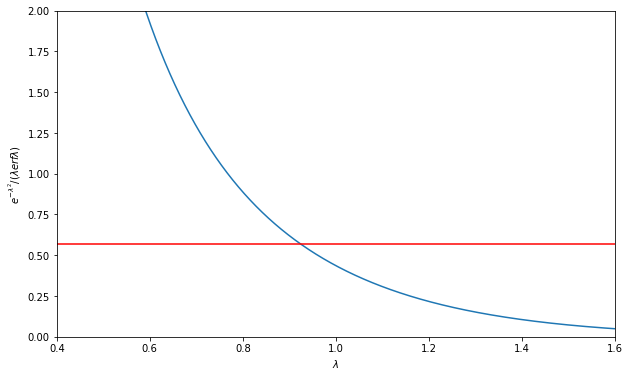

In [20]:
# solution
fig = plt.figure(figsize=[10,6])
plt.plot(lam, rights)
plt.axhline(y=lefts,xmin=0,xmax=1.6, color='red')
plt.ylim([0,2])
plt.xlim([0.4, 1.6])
plt.xlabel('$\lambda$')
plt.ylabel('$ e^{-\lambda^2}/ (\lambda erf \lambda)$');


In [21]:
# find the value for lambda which is approximately equal to the left side of the equation

In [22]:
# solution
idx = np.where(np.round(lefts,4) == np.round(rights,4))
print("For the right side, the value {:.4f} is obtained by a lambda value of {:.4f}".format(*(rights[idx[0][0]],
                                                                                              lam[idx[0][0]])))

For the right side, the value 0.5672 is obtained by a lambda value of 0.9253


<div class="alert alert-info">**Task:**  
Assuming a depth $y_m$ of 50 km for the lake, and we want to know the duration for the lake to fully solidify, we have to take the first equation with the obtained value for $\xi$ and re-arrange for t.  
$$ y_m = 2 \xi \sqrt{\kappa t} $$   

Once you come up with a formulation for t, plug in the numbers and calculate the time the lava lake would need to solidify. </div>

In [23]:
# calculate the time

In [24]:
# solution
t = 50000**2/(4*lam[idx[0][0]]**2*k)/y2s/1e6
print("It takes {:.2f} Million years for the magma lake to solidify.".format(t))

It takes 23.13 Million years for the magma lake to solidify.
